In [2]:
import pandas as pd
df = pd.read_csv("Dhaka Rent.csv", sep=' ')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Do experiment!

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("Dhaka Rent.csv", sep=' ')

In [38]:
df.head()

,area;rent
0,2000;31500
1,2100;35000
2,2500;41050
3,2250;36100
4,3000;52100


In [39]:
df.isnull().sum()

area;rent    0
dtype: int64

In [41]:
df = pd.read_csv("Dhaka Rent.csv", sep=";")

In [42]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [43]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [44]:
import matplotlib.pyplot as plt

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [46]:
df.isnull().sum()

area    0
rent    0
dtype: int64

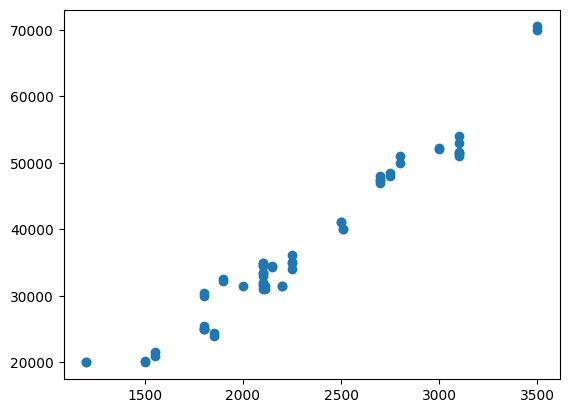

In [47]:
plt.scatter(df['area'],df['rent'])

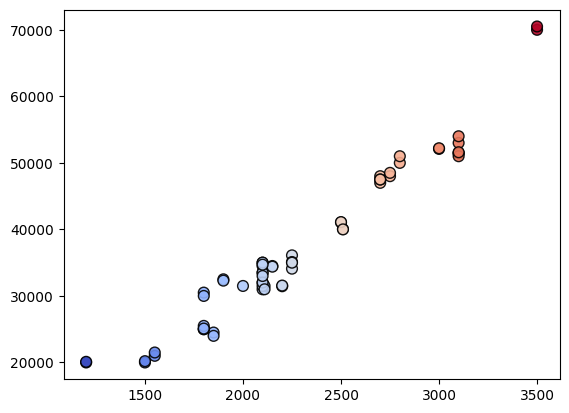

In [50]:
plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

Text(0.5, 1.0, 'Area VS. Rent')

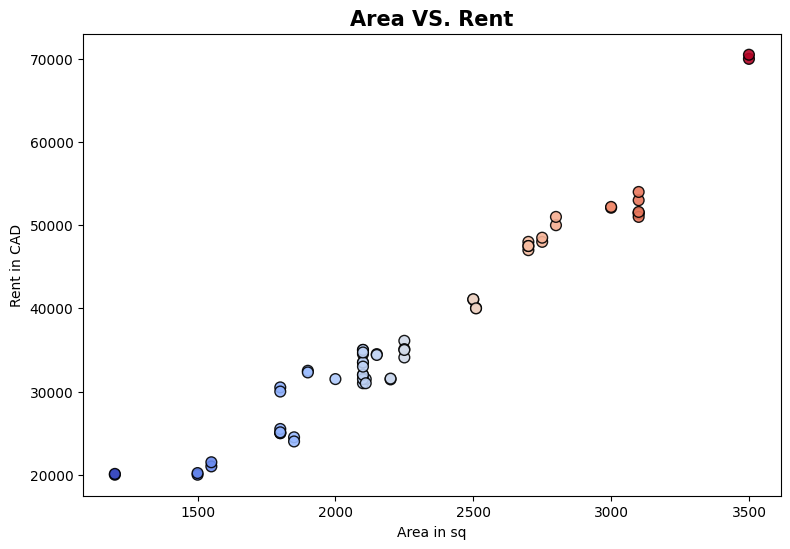

In [51]:
plt.figure(figsize=(9,6))

plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

plt.xlabel('Area in sq', fontsize=10)
plt.ylabel('Rent in CAD',fontsize=10)
plt.title('Area VS. Rent',fontsize=15, weight='bold')

In [52]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [55]:
import numpy as np             #train model to perform regression Analysis 

In [57]:
from sklearn.linear_model import LinearRegression

In [60]:
reg = LinearRegression() #y=mx+c 

In [70]:
reg = LinearRegression().fit(df[['area']],df['rent']) #this worked 

In [71]:
reg.coef_                       #value of m 

array([21.29266147])

In [72]:
reg.intercept_                 #value of c

np.float64(-11469.735446431114)

In [73]:
reg.predict([[2000]]) #for the value of x find the prediction value of y , actual value for y is 31500

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31115.58750079])

In [76]:
reg.predict(df[['area']]) #for all the area x given in the .csv file predict the rent y 

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [80]:
df2=df.copy() #copy the dataframe into a new variable

In [81]:
df2['Predicted'] = reg.predict(df[['area']]) # assign a new column named predicted to dataframe2 to store the predicted y values

In [82]:
df2.tail()    #last 5 recodrs in df2

,area,rent,Predicted
55,3100,54000,54537.515122
56,2750,48500,47085.083606
57,1800,25100,26857.055206
58,2200,31560,35374.119796
59,3100,51600,54537.515122


In [83]:
reg.score(df[['area']],df[['rent']])  #accuracy/score means 95% possibility of accurate result

0.950249380357677

In [84]:
reg.score(df2[['area']],df2[['Predicted']])  #accuracy/score means 100% possibility of accurate result

1.0

In [ ]:
#how to find the error/residuals

In [85]:
y_actual = df['rent']

In [87]:
y_predicted = reg.predict(df[['area']])
residual = y_actual - y_predicted
print(residual.head())

0     384.412499
1    1755.146352
2    -711.918238
3    -338.752869
4    -308.248974
Name: rent, dtype: float64


In [88]:
df2['Residuals'] = residual #assigning another column to see the difference

In [89]:
df2.head()

,area,rent,Predicted,Residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


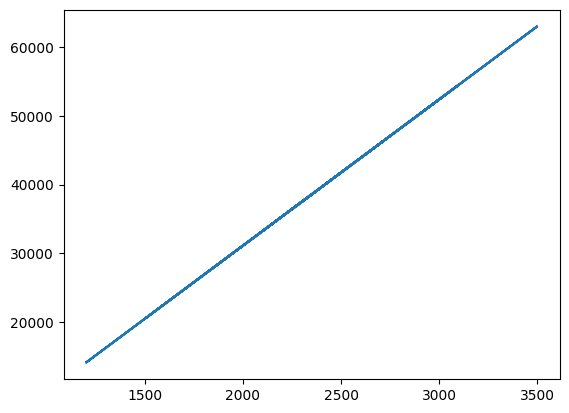

In [91]:
#plot a drawing to show the x and predicted y

plt.plot(df[['area']], reg.predict(df[['area']]))

Text(0.5, 1.0, 'Area VS. Rent')

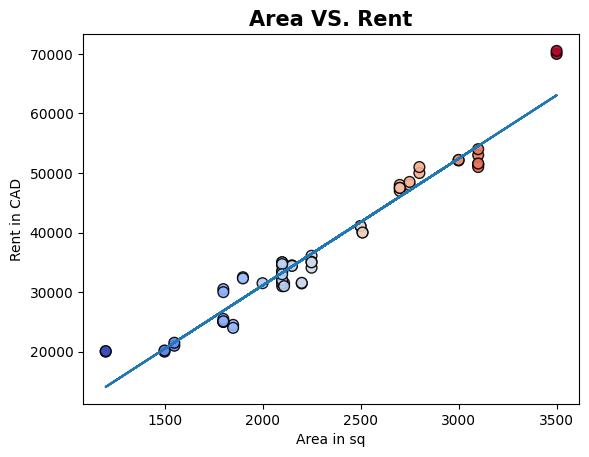

In [93]:
# show the actual x,y value with predicted linear regression line

plt.plot(df[['area']], reg.predict(df[['area']]))

plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

plt.xlabel('Area in sq', fontsize=10)
plt.ylabel('Rent in CAD',fontsize=10)
plt.title('Area VS. Rent',fontsize=15, weight='bold')

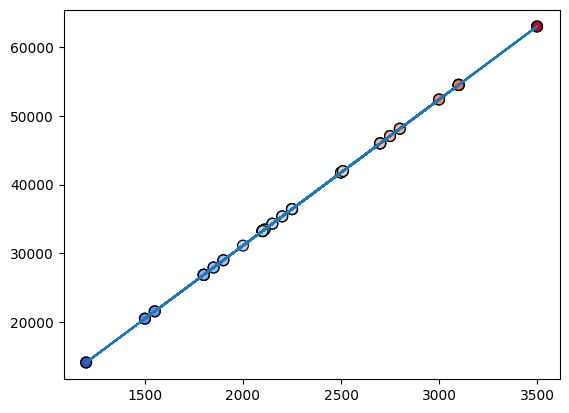

In [95]:
plt.plot(df[['area']], reg.predict(df[['area']]))  #plt.plot is the linear visualization of x and predicted y

plt.scatter(df['area'],                           #plt.scatter is the scattered visualization of x and predicted y
            reg.predict(df[['area']]), 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

[]

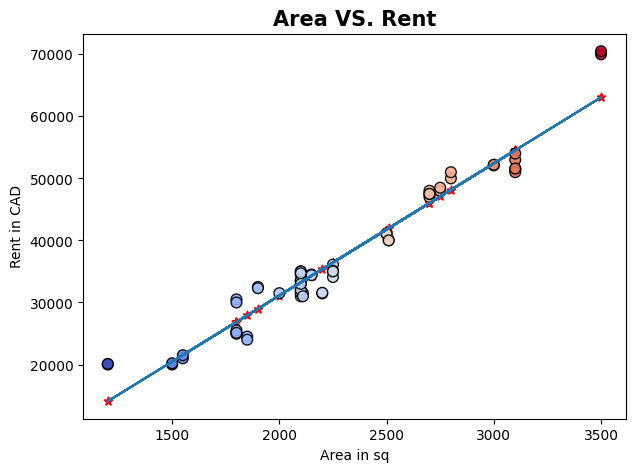

In [97]:
plt.figure(figsize=(7,5))

plt.scatter(df['area'],reg.predict(df[['area']]),color='red', marker='*') #shift + tab

plt.plot(df[['area']], reg.predict(df[['area']]))  #plt.plot is the linear visualization of x and predicted y

plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

plt.xlabel('Area in sq', fontsize=10)
plt.ylabel('Rent in CAD',fontsize=10)
plt.title('Area VS. Rent',fontsize=15, weight='bold')

plt.plot()

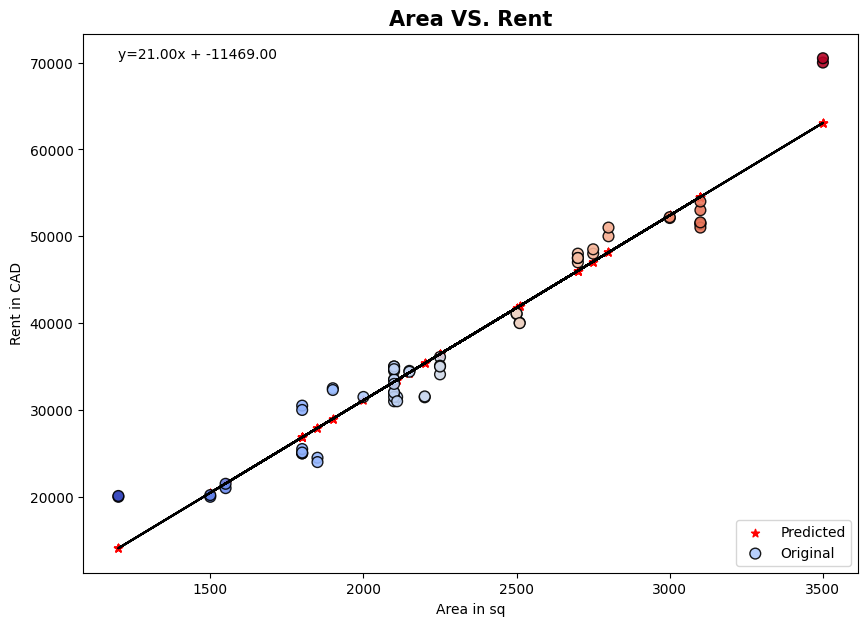

In [105]:
plt.figure(figsize=(10,7))

m = reg.coef_[0]
c = reg.intercept_
equ = f"y={int(m):.2f}x + {int(c):.2f}"

plt.text(min(df['area']), max(df['rent'])-50, equ)

plt.scatter(df['area'],reg.predict(df[['area']]),color='red', marker='*', label='Predicted') #shift + tab

plt.scatter(df['area'],reg.predict(df[['area']]),color='red', marker='*') #shift + tab

plt.scatter(df['area'], 
            df['rent'], 
            c=df['area'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k',
            label='Original') #shift + tab

plt.xlabel('Area in sq', fontsize=10)
plt.ylabel('Rent in CAD',fontsize=10)
plt.title('Area VS. Rent',fontsize=15, weight='bold')

plt.plot(df['area'], df2['Predicted'], color='black')

plt.legend()
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(df2[['rent']], df2['Predicted'])

6778077.204095561

In [107]:
mean_absolute_error(df2[['rent']], df2['Predicted'])

2009.8695093576282